In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import pandas as pd
import re
# import galois
# import sha3
# from Crypto.Hash import keccak
# from fastecdsa.curve import Curve
# from fastecdsa.point import Point
# from fastecdsa.curve import secp256k1

In [2]:
nir = np.load("../../data/nir.npy").astype("int")
swir = np.load("../../data/swir.npy").astype("int")
# nir = nir - nir.min()
# swir = swir - swir.min()
nir.shape

(247, 211)

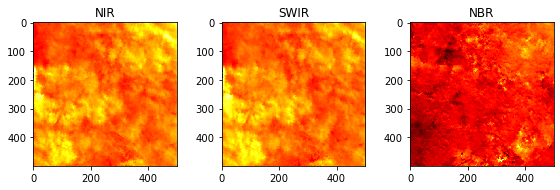

In [3]:
a = np.load("../../data/sat_data_031.npy")
nir_1 = a[0]
swir_1 = a[1]
a = np.load("../../data/sat_data_032.npy")
nir_2 = a[0]
swir_2 = a[1]
fig, ax = plt.subplots(1,3, figsize=(8, 8))
fig.tight_layout()
ax[0].imshow(nir_1, cmap='hot', interpolation='nearest')
ax[1].imshow(swir_1, cmap='hot', interpolation='nearest')
ax[2].imshow((nir_1-swir_1)/(nir_1+swir_1), cmap='hot', interpolation='nearest')
ax[0].set_title('NIR')
ax[1].set_title('SWIR')
ax[2].set_title('NBR')
plt.show()

In [4]:
sig = 0.28
epi = int(0.1 * len(a[0]))
def bushfire(a0, b0, a1, b1, sig, epi):
    # sig: dNBR threshold for high severity
    # epi: number of pixels of high severity area for claim threshoul

    D0 = (a0-b0) / (a0+b0)
    D1 = (a1-b1) / (a1+b1)
    #Dd = D0 - D1
    Dd = D0 - D1 - sig
    #print(len(Dd))
    #C = Dd - sig
    I = (Dd >= 0).astype(int)
    #C = C * I
    s = np.sum(I)
    sdepi = s - epi
    # store s as ground truth regardless of epi
    return s

In [5]:
number = ['01','02','03','04','05','06','07','08','09']
for i in range(10, 58):
    number.append(str(i))
    
ground_truth = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = nir_1.flatten()
    b0 = swir_1.flatten()
    a1 = nir_2.flatten()
    b1 = swir_2.flatten()

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    ground_truth.append(s)

print(len(ground_truth))

57


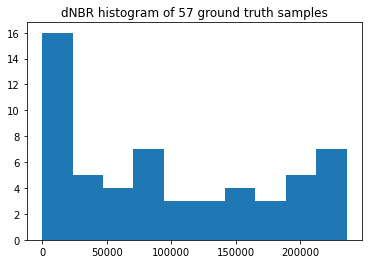

In [6]:
plt.title('dNBR histogram of 57 ground truth samples')
plt.hist(ground_truth)
plt.show()

In [7]:
def resize_np(img, pixel):
    avg_len = len(img)//pixel
    return np.array([np.mean(img[i*avg_len : (i+1)*avg_len]) if i!= pixel-1 else np.mean(img[i*avg_len :]) for i in range(pixel)])

(array([35.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0., 19.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

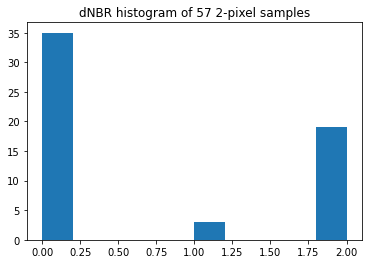

In [8]:
result_2 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 2)
    b0 = resize_np(swir_1.flatten(), 2)
    a1 = resize_np(nir_2.flatten(), 2)
    b1 = resize_np(swir_2.flatten(), 2)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_2.append(s)

plt.title('dNBR histogram of 57 2-pixel samples')
plt.hist(result_2)

(array([30.,  0.,  4.,  0.,  0.,  2.,  0.,  2.,  0., 19.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

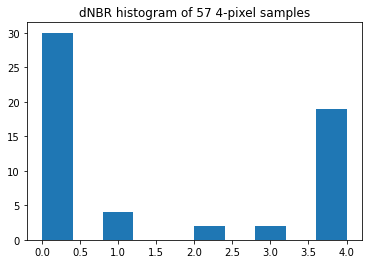

In [9]:
result_4 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 4)
    b0 = resize_np(swir_1.flatten(), 4)
    a1 = resize_np(nir_2.flatten(), 4)
    b1 = resize_np(swir_2.flatten(), 4)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_4.append(s)

plt.title('dNBR histogram of 57 4-pixel samples')
plt.hist(result_4)

(array([27.,  4.,  1.,  2.,  0.,  1.,  2.,  0.,  2., 18.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

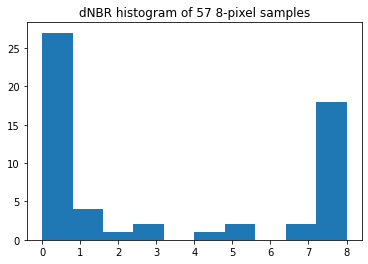

In [10]:
result_8 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 8)
    b0 = resize_np(swir_1.flatten(), 8)
    a1 = resize_np(nir_2.flatten(), 8)
    b1 = resize_np(swir_2.flatten(), 8)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_8.append(s)

plt.title('dNBR histogram of 57 8-pixel samples')
plt.hist(result_8)

(array([27.,  6.,  0.,  1.,  0.,  1.,  3.,  0.,  4., 15.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

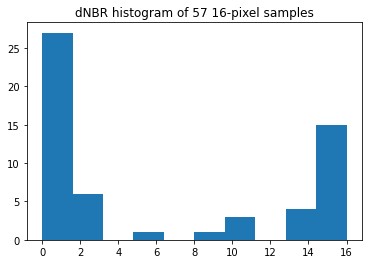

In [11]:
result_16 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 16)
    b0 = resize_np(swir_1.flatten(), 16)
    a1 = resize_np(nir_2.flatten(), 16)
    b1 = resize_np(swir_2.flatten(), 16)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_16.append(s)

plt.title('dNBR histogram of 57 16-pixel samples')
plt.hist(result_16)

(array([27.,  6.,  0.,  1.,  1.,  1.,  1.,  1.,  2., 17.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

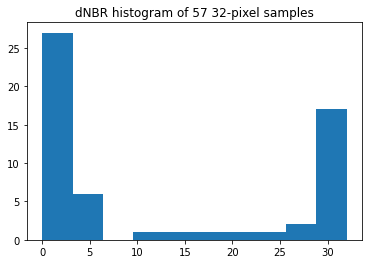

In [12]:
result_32 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 32)
    b0 = resize_np(swir_1.flatten(), 32)
    a1 = resize_np(nir_2.flatten(), 32)
    b1 = resize_np(swir_2.flatten(), 32)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_32.append(s)
    
plt.title('dNBR histogram of 57 32-pixel samples')
plt.hist(result_32)

(array([27.,  4.,  2.,  1.,  1.,  1.,  1.,  1.,  2., 17.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ]),
 <BarContainer object of 10 artists>)

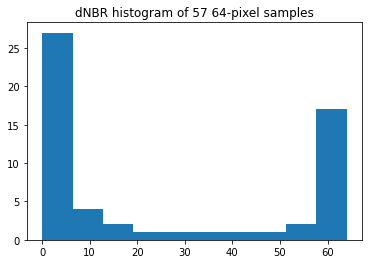

In [13]:
result_64 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 64)
    b0 = resize_np(swir_1.flatten(), 64)
    a1 = resize_np(nir_2.flatten(), 64)
    b1 = resize_np(swir_2.flatten(), 64)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_64.append(s)

plt.title('dNBR histogram of 57 64-pixel samples')
plt.hist(result_64)

(array([28.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,  2., 17.]),
 array([  0. ,  12.8,  25.6,  38.4,  51.2,  64. ,  76.8,  89.6, 102.4,
        115.2, 128. ]),
 <BarContainer object of 10 artists>)

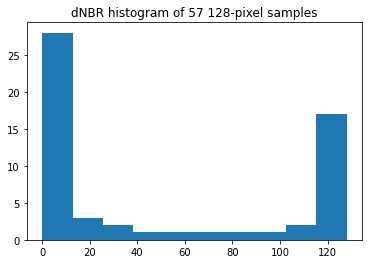

In [14]:
result_128 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 128)
    b0 = resize_np(swir_1.flatten(), 128)
    a1 = resize_np(nir_2.flatten(), 128)
    b1 = resize_np(swir_2.flatten(), 128)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_128.append(s)

plt.title('dNBR histogram of 57 128-pixel samples')
plt.hist(result_128)

(array([27.,  4.,  2.,  1.,  1.,  1.,  1.,  1.,  2., 17.]),
 array([  0. ,  25.6,  51.2,  76.8, 102.4, 128. , 153.6, 179.2, 204.8,
        230.4, 256. ]),
 <BarContainer object of 10 artists>)

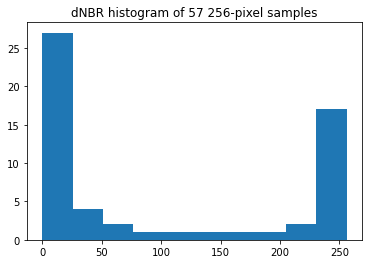

In [15]:
result_256 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 256)
    b0 = resize_np(swir_1.flatten(), 256)
    a1 = resize_np(nir_2.flatten(), 256)
    b1 = resize_np(swir_2.flatten(), 256)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_256.append(s)

plt.title('dNBR histogram of 57 256-pixel samples')
plt.hist(result_256)

(array([28.,  3.,  3.,  0.,  1.,  1.,  1.,  1.,  2., 17.]),
 array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. , 307.2, 358.4, 409.6,
        460.8, 512. ]),
 <BarContainer object of 10 artists>)

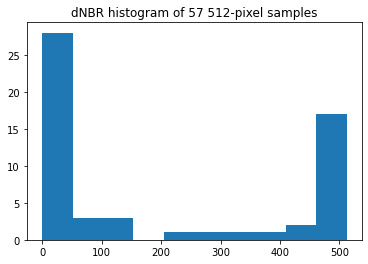

In [16]:
result_512 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 512)
    b0 = resize_np(swir_1.flatten(), 512)
    a1 = resize_np(nir_2.flatten(), 512)
    b1 = resize_np(swir_2.flatten(), 512)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_512.append(s)

plt.title('dNBR histogram of 57 512-pixel samples')
plt.hist(result_512)

(array([24.,  5.,  3.,  1.,  2.,  1.,  0.,  4.,  5., 12.]),
 array([   0. ,  102.4,  204.8,  307.2,  409.6,  512. ,  614.4,  716.8,
         819.2,  921.6, 1024. ]),
 <BarContainer object of 10 artists>)

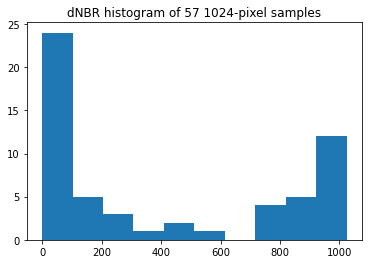

In [17]:
result_1024 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 1024)
    b0 = resize_np(swir_1.flatten(), 1024)
    a1 = resize_np(nir_2.flatten(), 1024)
    b1 = resize_np(swir_2.flatten(), 1024)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_1024.append(s)

plt.title('dNBR histogram of 57 1024-pixel samples')
plt.hist(result_1024)

(array([20.,  8.,  1.,  4.,  2.,  1.,  4.,  2.,  6.,  9.]),
 array([   0. ,  204.8,  409.6,  614.4,  819.2, 1024. , 1228.8, 1433.6,
        1638.4, 1843.2, 2048. ]),
 <BarContainer object of 10 artists>)

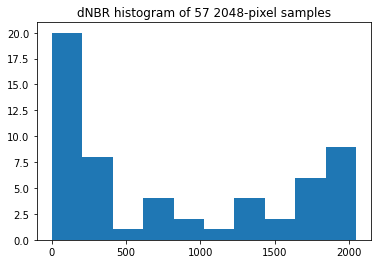

In [18]:
result_2048 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 2048)
    b0 = resize_np(swir_1.flatten(), 2048)
    a1 = resize_np(nir_2.flatten(), 2048)
    b1 = resize_np(swir_2.flatten(), 2048)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_2048.append(s)

plt.title('dNBR histogram of 57 2048-pixel samples')
plt.hist(result_2048)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23148\1062156495.py:7: RuntimeWarning: divide by zero encountered in true_divide
  D0 = (a0-b0) / (a0+b0)


(array([20.,  2.,  6.,  4.,  3.,  1.,  5.,  3.,  4.,  9.]),
 array([   0. ,  406.2,  812.4, 1218.6, 1624.8, 2031. , 2437.2, 2843.4,
        3249.6, 3655.8, 4062. ]),
 <BarContainer object of 10 artists>)

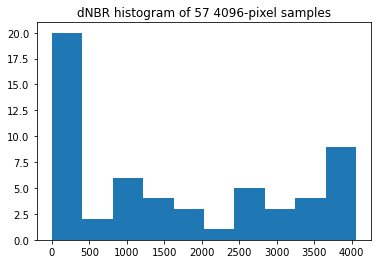

In [19]:
result_4096 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 4096)
    b0 = resize_np(swir_1.flatten(), 4096)
    a1 = resize_np(nir_2.flatten(), 4096)
    b1 = resize_np(swir_2.flatten(), 4096)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_4096.append(s)

plt.title('dNBR histogram of 57 4096-pixel samples')
plt.hist(result_4096)

(array([18.,  4.,  7.,  3.,  4.,  0.,  6.,  3.,  4.,  8.]),
 array([   0. ,  801.4, 1602.8, 2404.2, 3205.6, 4007. , 4808.4, 5609.8,
        6411.2, 7212.6, 8014. ]),
 <BarContainer object of 10 artists>)

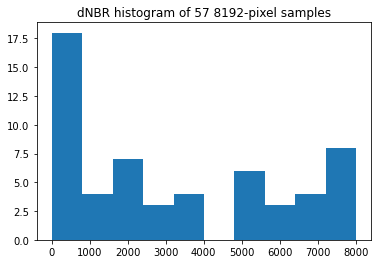

In [20]:
result_8192 = []
    
for i in range(57):

    a = np.load("../../data/sat_data_" + number[i] + "1.npy")
    nir_1 = a[0]
    swir_1 = a[1]
    a = np.load("../../data/sat_data_" + number[i] + "2.npy")
    nir_2 = a[0]
    swir_2 = a[1]

    a0 = resize_np(nir_1.flatten(), 8192)
    b0 = resize_np(swir_1.flatten(), 8192)
    a1 = resize_np(nir_2.flatten(), 8192)
    b1 = resize_np(swir_2.flatten(), 8192)

    s = bushfire(a0, b0, 
            a1, 
            b1, 
            sig, epi)
    result_8192.append(s)

plt.title('dNBR histogram of 57 8192-pixel samples')
plt.hist(result_8192)

In [21]:
ground_truth = np.array(ground_truth)
result_8192 = np.array(result_8192)
result_4096 = np.array(result_4096)
result_2048 = np.array(result_2048)
result_1024 = np.array(result_1024)
result_512 = np.array(result_512)
result_256 = np.array(result_256)
result_128 = np.array(result_128)
result_64 = np.array(result_64)
result_32 = np.array(result_32)
result_16 = np.array(result_16)
result_8 = np.array(result_8)
result_4 = np.array(result_4)
result_2 = np.array(result_2)

In [22]:
tf_table_gt = np.empty((100, 57), dtype='bool')
tf_table_8192 = np.empty((100, 57), dtype='bool')
tf_table_4096 = np.empty((100, 57), dtype='bool')
tf_table_2048 = np.empty((100, 57), dtype='bool')
tf_table_1024 = np.empty((100, 57), dtype='bool')
tf_table_512 = np.empty((100, 57), dtype='bool')
tf_table_256 = np.empty((100, 57), dtype='bool')
tf_table_128 = np.empty((100, 57), dtype='bool')
tf_table_64 = np.empty((100, 57), dtype='bool')
tf_table_32 = np.empty((100, 57), dtype='bool')
tf_table_16 = np.empty((100, 57), dtype='bool')
tf_table_8 = np.empty((100, 57), dtype='bool')
tf_table_4 = np.empty((100, 57), dtype='bool')
tf_table_2 = np.empty((100, 57), dtype='bool')
for i in range(1,101):
    tf_table_gt[i - 1] = (ground_truth >= 250000 * 0.01 * i).ravel()
    tf_table_8192[i - 1] = (result_8192 >= 8192 * 0.01 * i).ravel()
    tf_table_4096[i - 1] = (result_4096 >= 4096 * 0.01 * i).ravel()
    tf_table_2048[i - 1] = (result_2048 >= 2048 * 0.01 * i).ravel()
    tf_table_1024[i - 1] = (result_1024 >= 1024 * 0.01 * i).ravel()
    tf_table_512[i - 1] = (result_512 >= 512 * 0.01 * i).ravel()
    tf_table_256[i - 1] = (result_256 >= 256 * 0.01 * i).ravel()
    tf_table_128[i - 1] = (result_128 >= 128 * 0.01 * i).ravel()
    tf_table_64[i - 1] = (result_64 >= 64 * 0.01 * i).ravel()
    tf_table_32[i - 1] = (result_32 >= 32 * 0.01 * i).ravel()
    tf_table_16[i - 1] = (result_16 >= 16 * 0.01 * i).ravel()
    tf_table_8[i - 1] = (result_16 >= 8 * 0.01 * i).ravel()
    tf_table_4[i - 1] = (result_16 >= 4 * 0.01 * i).ravel()
    tf_table_2[i - 1] = (result_16 >= 2 * 0.01 * i).ravel()

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
accuracy_8192 = np.array([accuracy_score(tf_table_gt[i], tf_table_8192[i]) for i in range(100)])
accuracy_4096 = np.array([accuracy_score(tf_table_gt[i], tf_table_4096[i]) for i in range(100)])
accuracy_2048 = np.array([accuracy_score(tf_table_gt[i], tf_table_2048[i]) for i in range(100)])
accuracy_1024 = np.array([accuracy_score(tf_table_gt[i], tf_table_1024[i]) for i in range(100)])
accuracy_512 = np.array([accuracy_score(tf_table_gt[i], tf_table_512[i]) for i in range(100)])
accuracy_256 = np.array([accuracy_score(tf_table_gt[i], tf_table_256[i]) for i in range(100)])
accuracy_128 = np.array([accuracy_score(tf_table_gt[i], tf_table_128[i]) for i in range(100)])
accuracy_64 = np.array([accuracy_score(tf_table_gt[i], tf_table_64[i]) for i in range(100)])
accuracy_32 = np.array([accuracy_score(tf_table_gt[i], tf_table_32[i]) for i in range(100)])
accuracy_16 = np.array([accuracy_score(tf_table_gt[i], tf_table_16[i]) for i in range(100)])
accuracy_8 = np.array([accuracy_score(tf_table_gt[i], tf_table_8[i]) for i in range(100)])
accuracy_4 = np.array([accuracy_score(tf_table_gt[i], tf_table_4[i]) for i in range(100)])
accuracy_2 = np.array([accuracy_score(tf_table_gt[i], tf_table_2[i]) for i in range(100)])
f1_score_8192 = np.array([f1_score(tf_table_gt[i], tf_table_8192[i]) for i in range(100)])
f1_score_4096 = np.array([f1_score(tf_table_gt[i], tf_table_4096[i]) for i in range(100)])
f1_score_2048 = np.array([f1_score(tf_table_gt[i], tf_table_2048[i]) for i in range(100)])
f1_score_1024 = np.array([f1_score(tf_table_gt[i], tf_table_1024[i]) for i in range(100)])
f1_score_512 = np.array([f1_score(tf_table_gt[i], tf_table_512[i]) for i in range(100)])
f1_score_256 = np.array([f1_score(tf_table_gt[i], tf_table_256[i]) for i in range(100)])
f1_score_128 = np.array([f1_score(tf_table_gt[i], tf_table_128[i]) for i in range(100)])
f1_score_64 = np.array([f1_score(tf_table_gt[i], tf_table_64[i]) for i in range(100)])
f1_score_32 = np.array([f1_score(tf_table_gt[i], tf_table_32[i]) for i in range(100)])
f1_score_16 = np.array([f1_score(tf_table_gt[i], tf_table_16[i]) for i in range(100)])
f1_score_8 = np.array([f1_score(tf_table_gt[i], tf_table_8[i]) for i in range(100)])
f1_score_4 = np.array([f1_score(tf_table_gt[i], tf_table_4[i]) for i in range(100)])
f1_score_2 = np.array([f1_score(tf_table_gt[i], tf_table_2[i]) for i in range(100)])

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedM

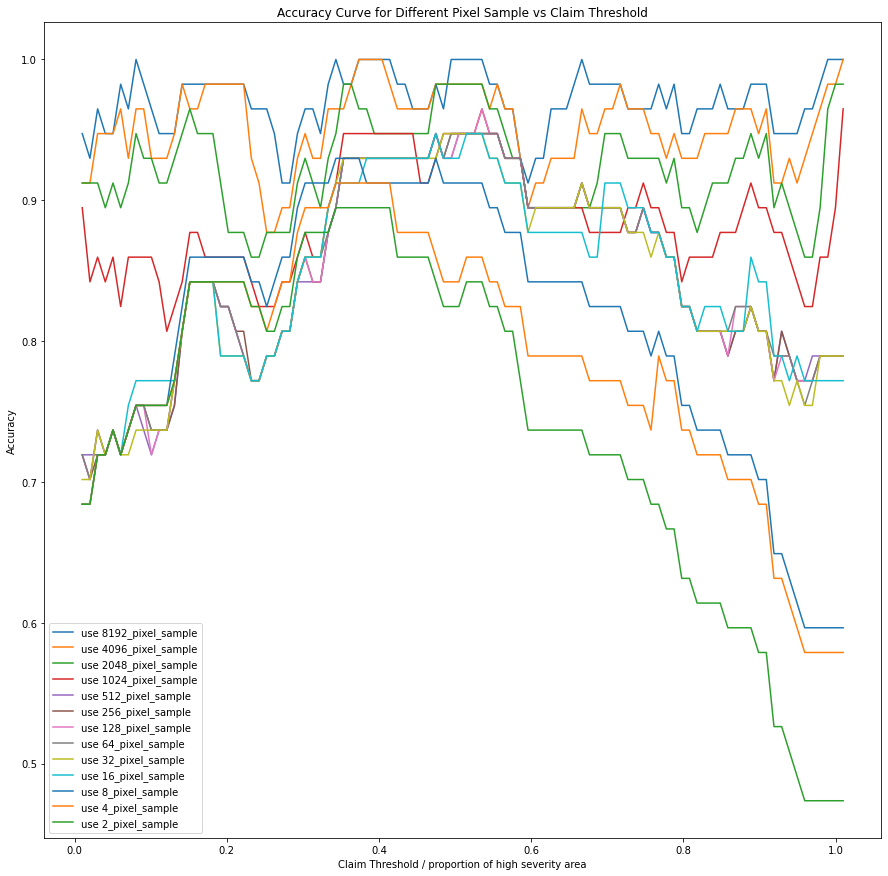

In [24]:
X=np.linspace(0.01,1.01,100)
plt.figure(figsize=(15,15))
plt.plot(X,accuracy_8192, label='use 8192_pixel_sample')
plt.plot(X,accuracy_4096, label='use 4096_pixel_sample')
plt.plot(X,accuracy_2048, label='use 2048_pixel_sample')
plt.plot(X,accuracy_1024, label='use 1024_pixel_sample')
plt.plot(X,accuracy_512, label='use 512_pixel_sample')
plt.plot(X,accuracy_256, label='use 256_pixel_sample')
plt.plot(X,accuracy_128, label='use 128_pixel_sample')
plt.plot(X,accuracy_64, label='use 64_pixel_sample')
plt.plot(X,accuracy_32, label='use 32_pixel_sample')
plt.plot(X,accuracy_16, label='use 16_pixel_sample')
plt.plot(X,accuracy_8, label='use 8_pixel_sample')
plt.plot(X,accuracy_4, label='use 4_pixel_sample')
plt.plot(X,accuracy_2, label='use 2_pixel_sample')
plt.xlabel("Claim Threshold / proportion of high severity area")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve for Different Pixel Sample vs Claim Threshold")
plt.legend()

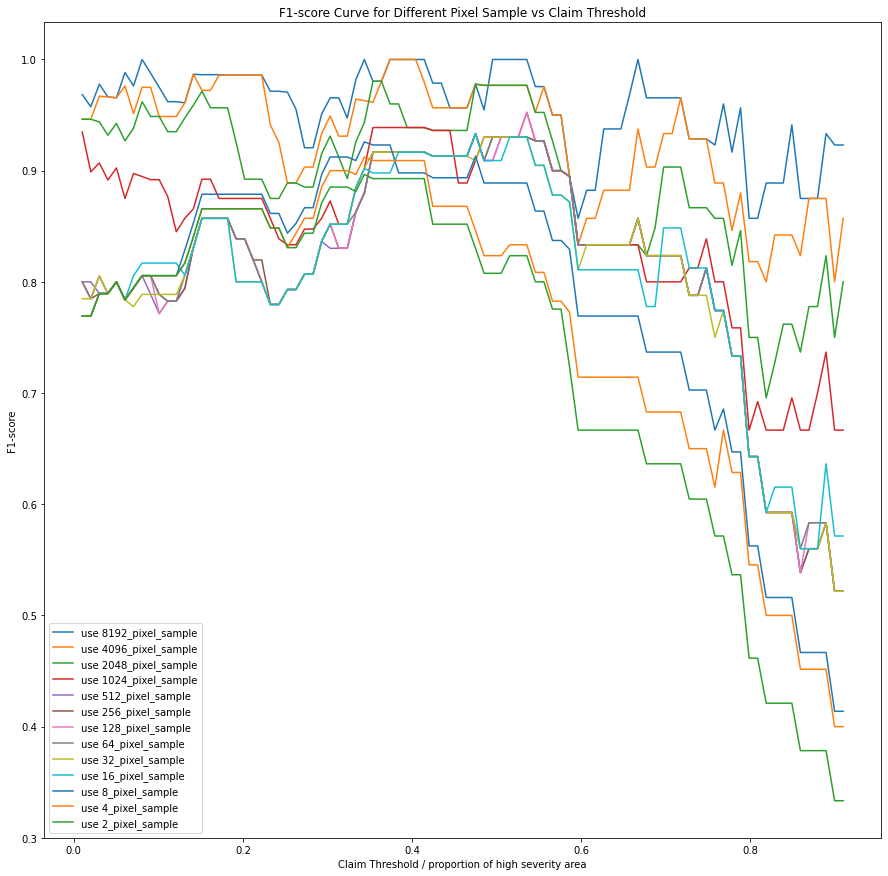

In [25]:
X=np.linspace(0.01,0.91,90)
plt.figure(figsize=(15,15))
plt.plot(X,f1_score_8192[:90], label='use 8192_pixel_sample')
plt.plot(X,f1_score_4096[:90], label='use 4096_pixel_sample')
plt.plot(X,f1_score_2048[:90], label='use 2048_pixel_sample')
plt.plot(X,f1_score_1024[:90], label='use 1024_pixel_sample')
plt.plot(X,f1_score_512[:90], label='use 512_pixel_sample')
plt.plot(X,f1_score_256[:90], label='use 256_pixel_sample')
plt.plot(X,f1_score_128[:90], label='use 128_pixel_sample')
plt.plot(X,f1_score_64[:90], label='use 64_pixel_sample')
plt.plot(X,f1_score_32[:90], label='use 32_pixel_sample')
plt.plot(X,f1_score_16[:90], label='use 16_pixel_sample')
plt.plot(X,f1_score_8[:90], label='use 8_pixel_sample')
plt.plot(X,f1_score_4[:90], label='use 4_pixel_sample')
plt.plot(X,f1_score_2[:90], label='use 2_pixel_sample')
plt.xlabel("Claim Threshold / proportion of high severity area")
plt.ylabel("F1-score")
plt.title("F1-score Curve for Different Pixel Sample vs Claim Threshold")
plt.legend()

In [26]:
import pandas as pd

data = np.empty((13, 14))
j = 0
for i in [29, 39, 49, 59, 69, 79]:
    data[0, j] = accuracy_2[i]
    data[1, j] = accuracy_4[i]
    data[2, j] = accuracy_8[i]
    data[3, j] = accuracy_16[i]
    data[4, j] = accuracy_32[i]
    data[5, j] = accuracy_64[i]
    data[6, j] = accuracy_128[i]
    data[7, j] = accuracy_256[i]
    data[8, j] = accuracy_512[i]
    data[9, j] = accuracy_1024[i]
    data[10, j] = accuracy_2048[i]
    data[11, j] = accuracy_4096[i]
    data[12, j] = accuracy_8192[i]
    data[0, j + 6] = f1_score_2[i]
    data[1, j + 6] = f1_score_4[i]
    data[2, j + 6] = f1_score_8[i]
    data[3, j + 6] = f1_score_16[i]
    data[4, j + 6] = f1_score_32[i]
    data[5, j + 6] = f1_score_64[i]
    data[6, j + 6] = f1_score_128[i]
    data[7, j + 6] = f1_score_256[i]
    data[8, j + 6] = f1_score_512[i]
    data[9, j + 6] = f1_score_1024[i]
    data[10, j + 6] = f1_score_2048[i]
    data[11, j + 6] = f1_score_4096[i]
    data[12, j + 6] = f1_score_8192[i]
    j += 1

data[0, 12] = np.mean(accuracy_2[29:80])
data[1, 12] = np.mean(accuracy_4[29:80])
data[2, 12] = np.mean(accuracy_8[29:80])
data[3, 12] = np.mean(accuracy_16[29:80])
data[4, 12] = np.mean(accuracy_32[29:80])
data[5, 12] = np.mean(accuracy_64[29:80])
data[6, 12] = np.mean(accuracy_128[29:80])
data[7, 12] = np.mean(accuracy_256[29:80])
data[8, 12] = np.mean(accuracy_512[29:80])
data[9, 12] = np.mean(accuracy_1024[29:80])
data[10, 12] = np.mean(accuracy_2048[29:80])
data[11, 12] = np.mean(accuracy_4096[29:80])
data[12, 12] = np.mean(accuracy_8192[29:80])

data[0, 13] = np.mean(f1_score_2[29:80])
data[1, 13] = np.mean(f1_score_4[29:80])
data[2, 13] = np.mean(f1_score_8[29:80])
data[3, 13] = np.mean(f1_score_16[29:80])
data[4, 13] = np.mean(f1_score_32[29:80])
data[5, 13] = np.mean(f1_score_64[29:80])
data[6, 13] = np.mean(f1_score_128[29:80])
data[7, 13] = np.mean(f1_score_256[29:80])
data[8, 13] = np.mean(f1_score_512[29:80])
data[9, 13] = np.mean(f1_score_1024[29:80])
data[10, 13] = np.mean(f1_score_2048[29:80])
data[11, 13] = np.mean(f1_score_4096[29:80])
data[12, 13] = np.mean(f1_score_8192[29:80])

In [27]:
columns = ['threshold 0.3 accuracy', 'threshold 0.4 accuracy', 'threshold 0.5 accuracy', 'threshold 0.6 accuracy', 'threshold 0.7 accuracy', 'threshold 0.8 accuracy', 
          'threshold 0.3 f1_score', 'threshold 0.4 f1_score', 'threshold 0.5 f1_score', 'threshold 0.6 f1_score', 'threshold 0.7 f1_score', 'threshold 0.8 f1_score', 
          '0.30 to 0.80 mean accuracy', '0.30 to 0.80 mean f1_score']
index = ['2 pixel', '4 pixel', '8 pixel', '16 pixel', '32 pixel', '64 pixel', '128 pixel', '256 pixel', '512 pixel', '1024 pixel', '2048 pixel', '4096 pixel', '8192 pixel']

In [28]:
df = pd.DataFrame(data, columns=columns, index=index)

In [29]:
df

,threshold 0.3 accuracy,threshold 0.4 accuracy,threshold 0.5 accuracy,threshold 0.6 accuracy,threshold 0.7 accuracy,threshold 0.8 accuracy,threshold 0.3 f1_score,threshold 0.4 f1_score,threshold 0.5 f1_score,threshold 0.6 f1_score,threshold 0.7 f1_score,threshold 0.8 f1_score,0.30 to 0.80 mean accuracy,0.30 to 0.80 mean f1_score
2 pixel,0.877193,0.894737,0.824561,0.736842,0.719298,0.631579,0.885246,0.892857,0.807692,0.666667,0.636364,0.461538,0.792226,0.745282
4 pixel,0.894737,0.912281,0.842105,0.789474,0.771930,0.736842,0.900000,0.909091,0.823529,0.714286,0.682927,0.545455,0.830753,0.778291
8 pixel,0.912281,0.912281,0.912281,0.842105,0.824561,0.754386,0.912281,0.897959,0.888889,0.769231,0.736842,0.562500,0.869969,0.815608
16 pixel,0.859649,0.929825,0.929825,0.877193,0.912281,0.824561,0.851852,0.916667,0.909091,0.810811,0.848485,0.642857,0.900929,0.852596
32 pixel,0.859649,0.929825,0.947368,0.894737,0.894737,0.824561,0.851852,0.916667,0.930233,0.833333,0.823529,0.642857,0.904369,0.856426
64 pixel,0.859649,0.929825,0.947368,0.894737,0.894737,0.824561,0.851852,0.916667,0.930233,0.833333,0.823529,0.642857,0.906433,0.859202
128 pixel,0.859649,0.929825,0.947368,0.894737,0.894737,0.824561,0.851852,0.916667,0.930233,0.833333,0.823529,0.642857,0.905745,0.858372
256 pixel,0.859649,0.929825,0.947368,0.894737,0.894737,0.824561,0.851852,0.916667,0.930233,0.833333,0.823529,0.642857,0.905745,0.858353
512 pixel,0.842105,0.929825,0.947368,0.894737,0.894737,0.824561,0.830189,0.916667,0.930233,0.833333,0.823529,0.642857,0.905057,0.857513
1024 pixel,0.877193,0.947368,0.947368,0.894737,0.877193,0.859649,0.872727,0.938776,0.930233,0.833333,0.800000,0.692308,0.911937,0.866438


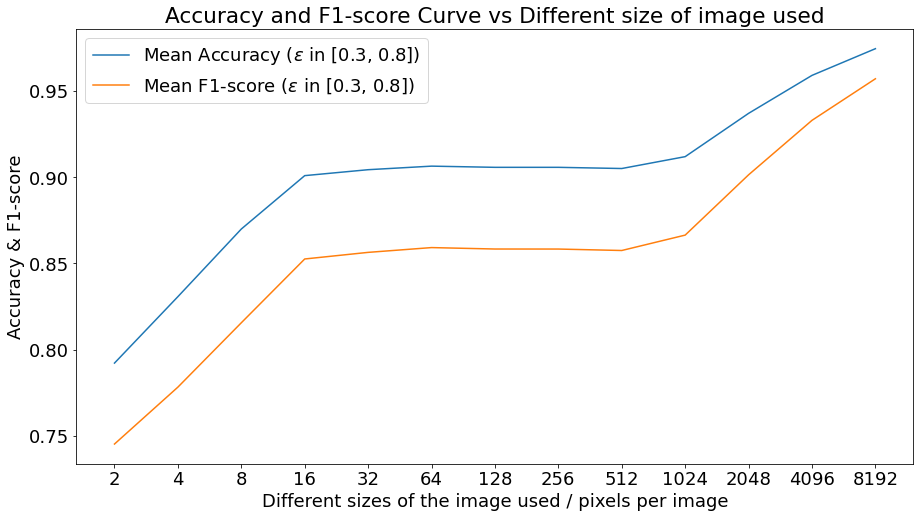

In [44]:
index = ['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024', '2048', '4096', '8192']
X=np.array(index)
plt.rcParams.update({'font.size':18})
plt.figure(figsize=(15,8))
plt.plot(X, data[:, 12], label='Mean Accuracy ($\epsilon$ in [0.3, 0.8])')#Mean Accuracy when epsilon between 0.3 and 0.8
plt.plot(X, data[:, 13], label='Mean F1-score ($\epsilon$ in [0.3, 0.8])')
plt.xlabel("Different sizes of the image used / pixels per image")
plt.ylabel("Accuracy & F1-score")
plt.title("Accuracy and F1-score Curve vs Different size of image used")
plt.legend()
plt.savefig('../../../xx.svg',format='svg',dpi=150000)

In [31]:
df.to_excel("output.xlsx")